# In this notebook, we search for the best.

In [1]:
import sys
import importlib
import pickle

# data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data analysis
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# pytorch specific
import torch
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm

# project specific
sys.path.append('../')
from src import config
from src.utils import experiment



from matplotlib.animation import FuncAnimation
from IPython.display import HTML

pd.options.display.width = 1000
DEVICE = torch.device(config["DEVICE"])

In [2]:
data_params = { 
    "LS_threshold" : 0.0018,
    "MAD_threshold" : 1, 
    "MT_removal" : True, 
    "expression_threshold" : 0.1}

model_params = {
    "dropout" : 0.2,
    "latent_dim" : 64,
    "is_variational" : False,
    "use_convolution": True}


# Define the parameters to vary
latent_dim_array = [16, 32, 64, 128]
padding_and_kernel_array = [(3, 7), (2, 5), (1, 3)]  # Assuming this is for convolution

# This will hold all the configurations you create
configurations = []

# You'll create dictionaries of parameters for each combination
for latent_dim in latent_dim_array:
    for padding, kernel_size in padding_and_kernel_array:
        # Copy the original parameters
        new_data_params = data_params.copy()  # Assuming data_params doesn't change

        new_model_params = model_params.copy()  # Create a new dictionary for the model params
        new_model_params['latent_dim'] = latent_dim  # Set the new latent dimension

        # If your convolution parameter needs these, set them here
        # Let's assume you want to add them like this:
        new_model_params['padding'] = padding
        new_model_params['kernel_size'] = kernel_size

        # Now, you have a new set of parameters to experiment with
        config = {
            'data_params': new_data_params,
            'model_params': new_model_params
        }
        
        # Add this configuration to your list
        configurations.append(config)

# Now, 'configurations' is a list of dictionaries, each with a unique combination of parameters
# You can iterate over this list and pass each dictionary to your pipeline for experimentation



loading samples...
removing 37 mithocondrial genes from the dataset
selecting genes based on expression threshold:  0.1 ...
removing 37862 genes under the expression threshold from the dataset
selecting genes based on median absolute deviation (MAD) threshold:  1 ...
removing 12484 genes under the MAD threshold from the dataset
selecting genes based on Laplacian Score (LS) threshold:  0.0018 ...
removing 3125 genes under the LS threshold from the dataset
number of genes selected :  7152
matching :  7152
log(1 + x) transformation...
scaling to [0, 1]...
shape of the dataset : (1231, 7152)
number of seq in the dataset : 1231
input shape : 7152
(1231, 7152)
(1231, 1, 7152)
train data: 1231


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
 30%|███       | 9/30 [00:53<02:01,  5.77s/it]

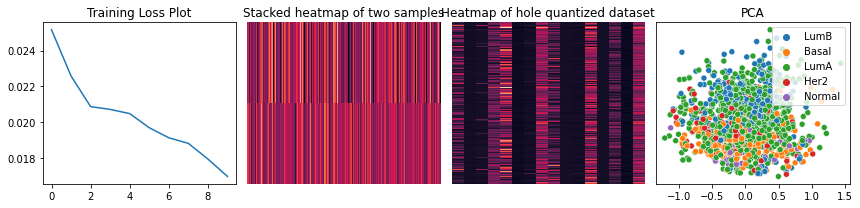

 33%|███▎      | 10/30 [01:02<02:12,  6.61s/it]

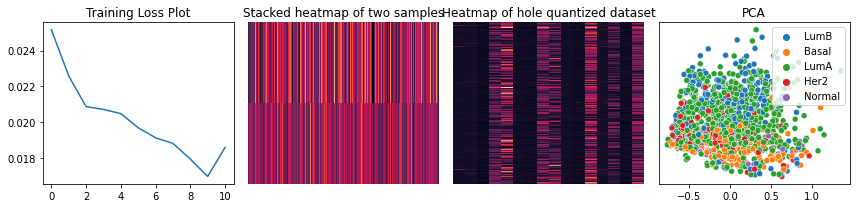

 40%|████      | 12/30 [01:16<02:03,  6.83s/it]

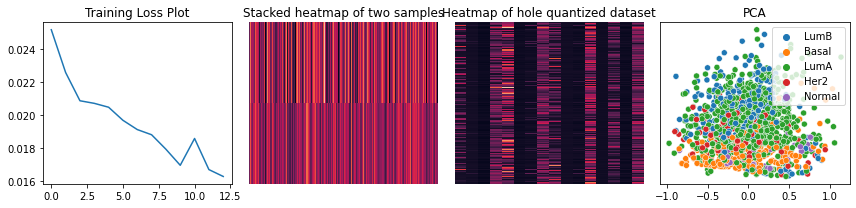

 47%|████▋     | 14/30 [01:33<01:58,  7.41s/it]

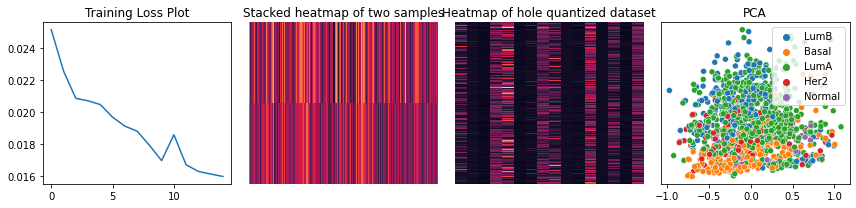

 53%|█████▎    | 16/30 [01:49<01:45,  7.53s/it]

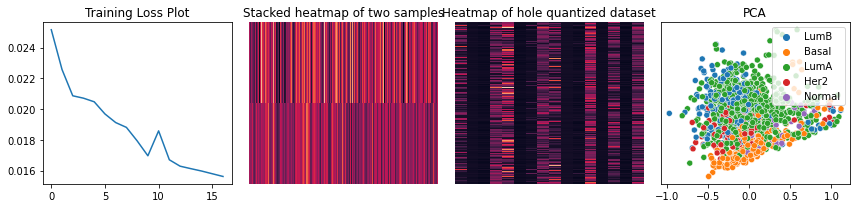

 63%|██████▎   | 19/30 [02:11<01:17,  7.07s/it]

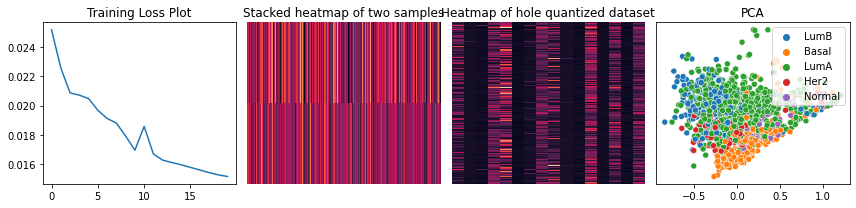

 73%|███████▎  | 22/30 [02:30<00:51,  6.41s/it]

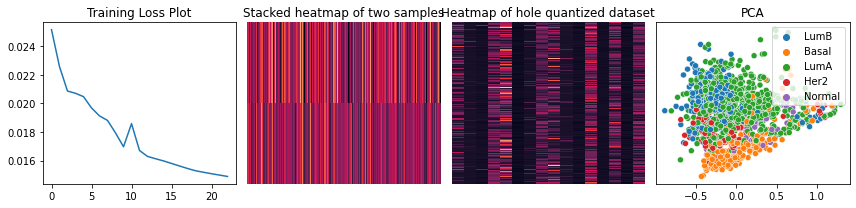

 83%|████████▎ | 25/30 [02:49<00:31,  6.24s/it]

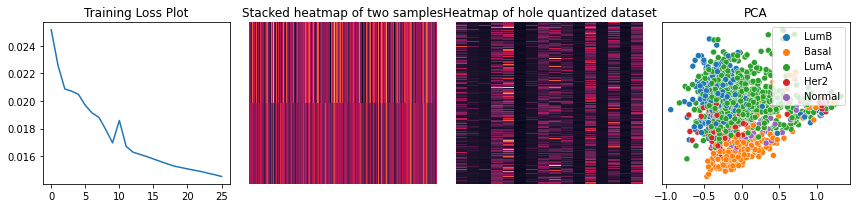

 97%|█████████▋| 29/30 [03:16<00:06,  6.23s/it]

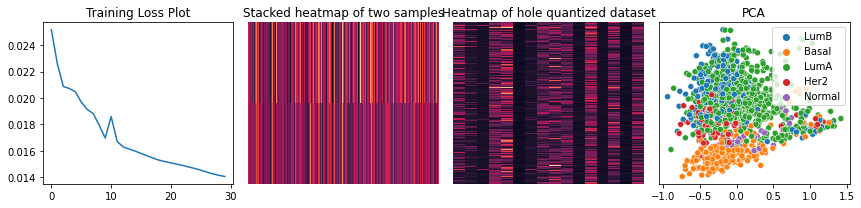

100%|██████████| 30/30 [03:24<00:00,  6.82s/it]


loading samples...
removing 37 mithocondrial genes from the dataset
selecting genes based on expression threshold:  0.1 ...
removing 37862 genes under the expression threshold from the dataset
selecting genes based on median absolute deviation (MAD) threshold:  1 ...
removing 12484 genes under the MAD threshold from the dataset
selecting genes based on Laplacian Score (LS) threshold:  0.0018 ...
removing 3125 genes under the LS threshold from the dataset
number of genes selected :  7152
matching :  7152
log(1 + x) transformation...
scaling to [0, 1]...
shape of the dataset : (1231, 7152)
number of seq in the dataset : 1231


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


input shape : 7152
(1231, 7152)
(1231, 1, 7152)
train data: 1231


 30%|███       | 9/30 [00:47<01:48,  5.14s/it]

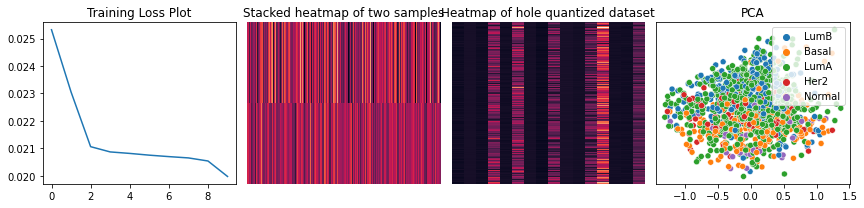

 33%|███▎      | 10/30 [00:55<01:58,  5.92s/it]

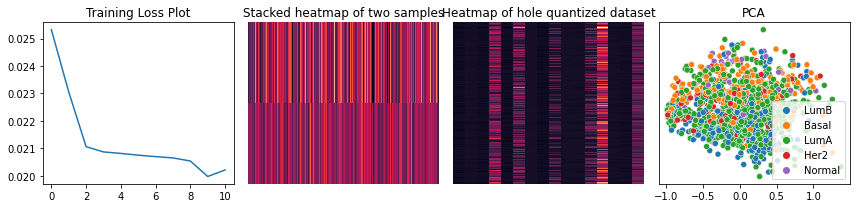

 40%|████      | 12/30 [01:08<01:52,  6.24s/it]

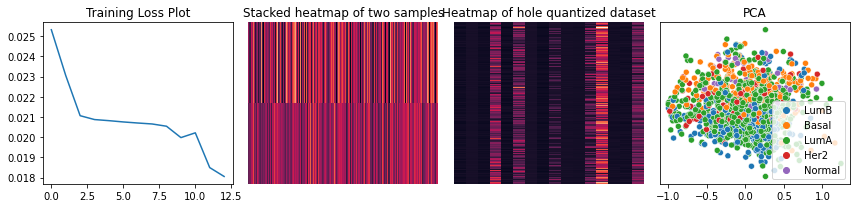

 47%|████▋     | 14/30 [01:23<01:46,  6.68s/it]

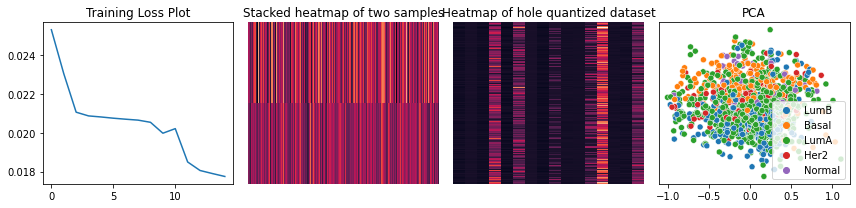

 53%|█████▎    | 16/30 [01:37<01:32,  6.64s/it]

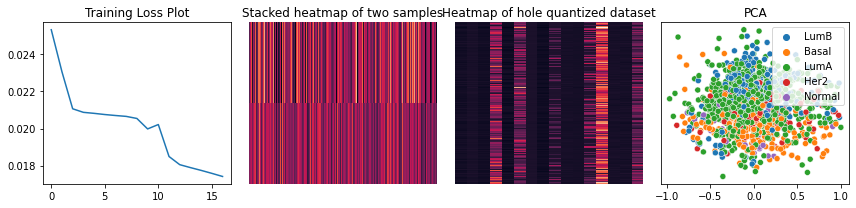

 63%|██████▎   | 19/30 [01:58<01:13,  6.65s/it]

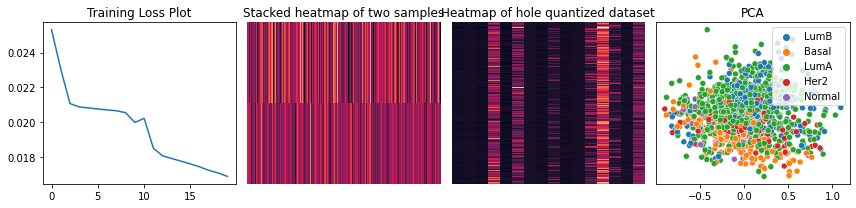

 73%|███████▎  | 22/30 [02:18<00:51,  6.45s/it]

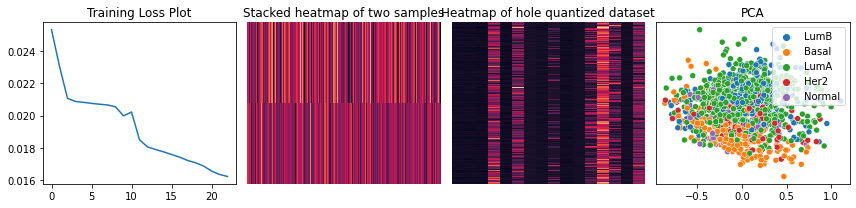

 83%|████████▎ | 25/30 [02:37<00:31,  6.30s/it]

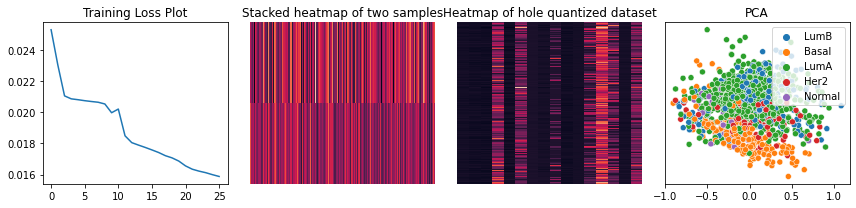

 97%|█████████▋| 29/30 [03:05<00:06,  6.61s/it]

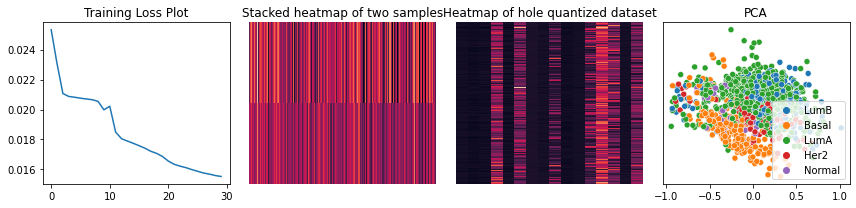

100%|██████████| 30/30 [03:13<00:00,  6.44s/it]


loading samples...
removing 37 mithocondrial genes from the dataset
selecting genes based on expression threshold:  0.1 ...
removing 37862 genes under the expression threshold from the dataset
selecting genes based on median absolute deviation (MAD) threshold:  1 ...
removing 12484 genes under the MAD threshold from the dataset
selecting genes based on Laplacian Score (LS) threshold:  0.0018 ...
removing 3125 genes under the LS threshold from the dataset
number of genes selected :  7152
matching :  7152
log(1 + x) transformation...
scaling to [0, 1]...


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


shape of the dataset : (1231, 7152)
number of seq in the dataset : 1231
input shape : 7152
(1231, 7152)
(1231, 1, 7152)
train data: 1231


 30%|███       | 9/30 [00:50<01:46,  5.05s/it]

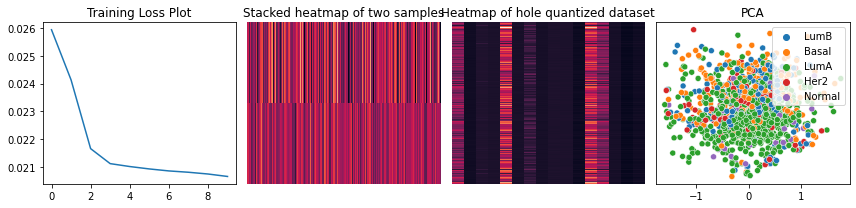

 33%|███▎      | 10/30 [00:57<01:49,  5.48s/it]

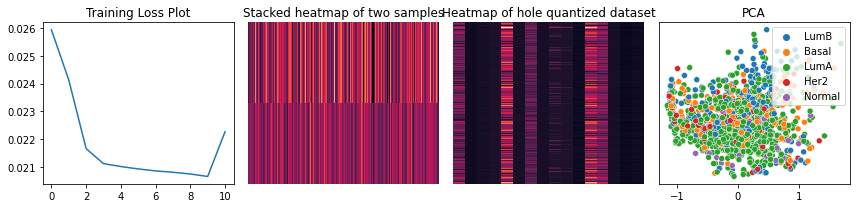

 40%|████      | 12/30 [01:09<01:43,  5.74s/it]

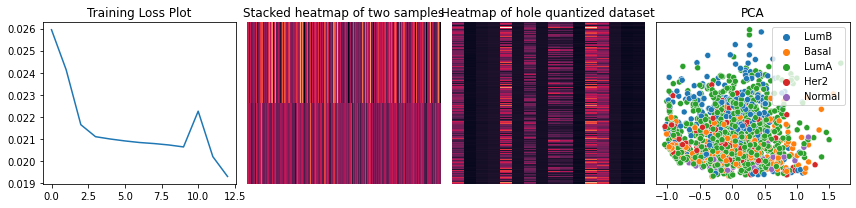

 47%|████▋     | 14/30 [01:20<01:31,  5.69s/it]

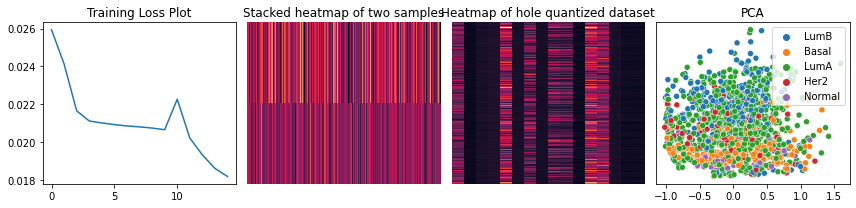

 53%|█████▎    | 16/30 [01:32<01:19,  5.68s/it]

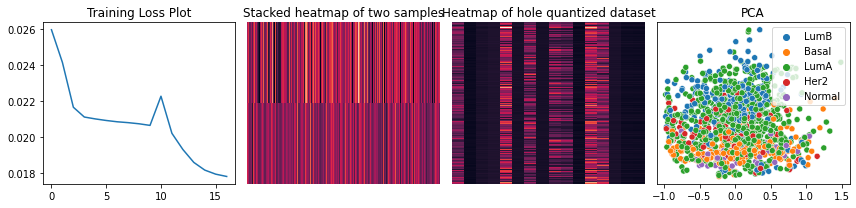

 63%|██████▎   | 19/30 [01:49<01:00,  5.52s/it]

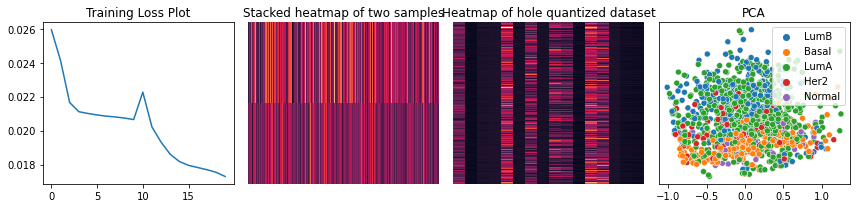

 73%|███████▎  | 22/30 [02:06<00:44,  5.53s/it]

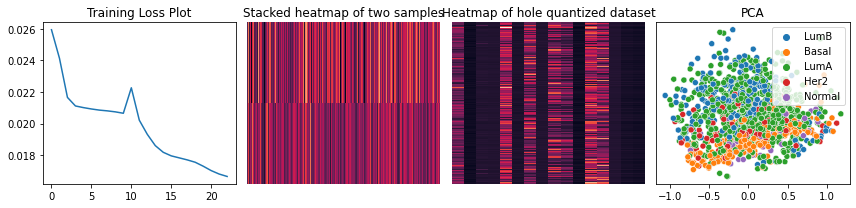

 83%|████████▎ | 25/30 [02:23<00:27,  5.42s/it]

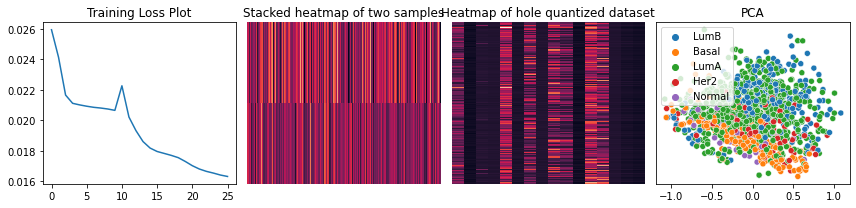

 97%|█████████▋| 29/30 [02:44<00:05,  5.28s/it]

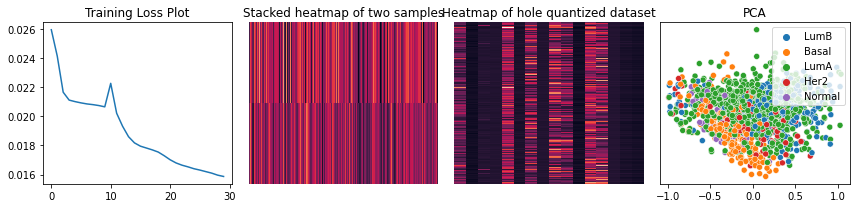

100%|██████████| 30/30 [02:51<00:00,  5.72s/it]


In [5]:
experiments = []

for config in configurations[:3]:
    e = experiment.Experiment(data_param=config["data_params"], model_param=config["model_params"], n_epoch= 30)
    e.run()

    experiment_data = {
            'config': config,
            'score': e.metric
        }
    experiments.append(experiment_data)




In [6]:
experiments

[{'config': {'data_params': {'LS_threshold': 0.0018,
    'MAD_threshold': 1,
    'MT_removal': True,
    'expression_threshold': 0.1},
   'model_params': {'dropout': 0.2,
    'latent_dim': 16,
    'is_variational': False,
    'use_convolution': True,
    'padding': 3,
    'kernel_size': 7}},
  'score': 0.18727837876743492},
 {'config': {'data_params': {'LS_threshold': 0.0018,
    'MAD_threshold': 1,
    'MT_removal': True,
    'expression_threshold': 0.1},
   'model_params': {'dropout': 0.2,
    'latent_dim': 16,
    'is_variational': False,
    'use_convolution': True,
    'padding': 2,
    'kernel_size': 5}},
  'score': 0.17617420634910147},
 {'config': {'data_params': {'LS_threshold': 0.0018,
    'MAD_threshold': 1,
    'MT_removal': True,
    'expression_threshold': 0.1},
   'model_params': {'dropout': 0.2,
    'latent_dim': 16,
    'is_variational': False,
    'use_convolution': True,
    'padding': 1,
    'kernel_size': 3}},
  'score': 0.17499834802140346}]

In [7]:
# Find the experiment with the highest score.
best_experiment = max(experiments, key=lambda exp: exp['score'])

# 'best_experiment' now holds the dictionary with the highest 'score' value.
best_config = best_experiment['config']
highest_score = best_experiment['score']

# You can print or otherwise use 'best_config' and 'highest_score' as needed.
print("Best configuration:", best_config)
print("Highest score:", highest_score)

Best configuration: {'data_params': {'LS_threshold': 0.0018, 'MAD_threshold': 1, 'MT_removal': True, 'expression_threshold': 0.1}, 'model_params': {'dropout': 0.2, 'latent_dim': 16, 'is_variational': False, 'use_convolution': True, 'padding': 3, 'kernel_size': 7}}
Highest score: 0.18727837876743492
